# Problem 7

$$
\tag{1}
y'' + y = \epsilon y^2 + \epsilon \cos(t), \quad y'(0)=0.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-poster')

## 初始想法

### 1. $\epsilon=0$

$$
\tag{2}
y'' + y = 0, \quad y'(0)=0.
$$

那 $y(t) = A\cos(t)$.

### 2. 簡化模型

$$
\tag{3}
y'' + y = \epsilon y^2, \quad y'(0)=0.
$$

轉成 1st-order ODE system, $u = y$, $v = y'$, 得到
$$
\tag{4}
\begin{align}
u' &= v,\\
v' &= \epsilon u^2 - u = \epsilon u (u - 1/\epsilon)
\end{align}
$$
這樣可以看 phase plane, 如下圖. 可以看到有個 periodic orbit 介於 $\epsilon/2 < u< \epsilon$ 這範圍, 超過這範圍就沒有週期解了. 

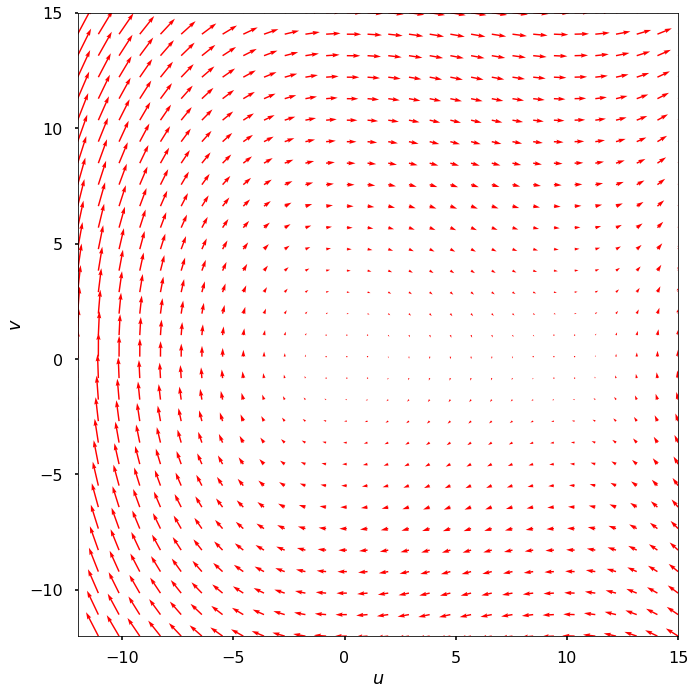

In [3]:
def f(Y, t, eps):
    y1, y2 = Y
    return [y2, eps*y1**2 - y1]

eps = 0.1

y1 = np.linspace(-1.2/eps, 1.5/eps, 30)
y2 = np.linspace(-1.2/eps, 1.5/eps, 30)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t, eps)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     
plt.figure(figsize = (10, 10))

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$u$')
plt.ylabel('$v$')
plt.xlim([-1.2/eps, 1.5/eps])
plt.ylim([-1.2/eps, 1.5/eps])
plt.tight_layout()
plt.show()

In [153]:
def func(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2)])

a = 0.0
b = 5000.0
t_eval = np.arange(a, b, 0.001)

# 定義 ODE
eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);
# initial condition
y1 = [-4.8, 0.0]
# solve the ODE
sol1 = solve_ivp(ode1, [a, b], y1, t_eval=t_eval)

# 定義 ODE
eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);
# initial condition
y2 = [-48, 0.0]
# Solve the system
sol2 = solve_ivp(ode2, [a, b], y2, t_eval=t_eval)

# 定義 ODE
eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);
# initial condition
y3 = [-400, 0.0]

# Solve the system
sol3 = solve_ivp(ode3, [a, b], y3, t_eval=t_eval)

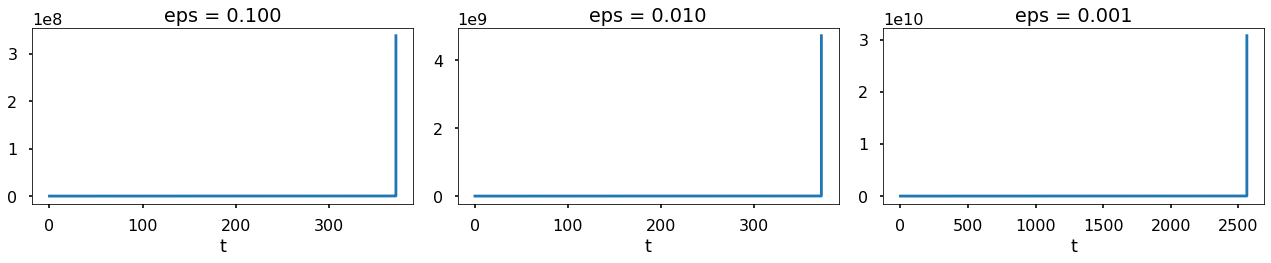

In [154]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.t, sol3.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

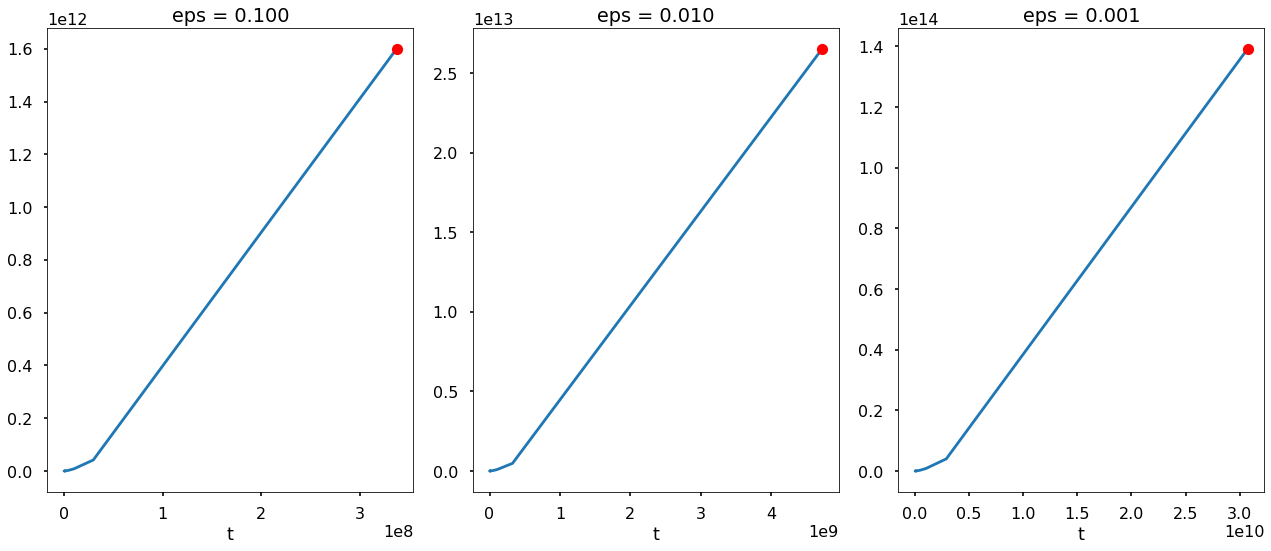

In [155]:
plt.figure(figsize = (18, 8))

plt.subplot(131)
plt.plot(sol1.y[0], sol1.y[1])
plt.plot(sol1.y[0][-1], sol1.y[1][-1], 'ro')
plt.xlabel('t')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.y[0], sol2.y[1])
plt.plot(sol2.y[0][-1], sol2.y[1][-1], 'ro')
plt.xlabel('t')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.y[0], sol3.y[1])
plt.plot(sol3.y[0][-1], sol3.y[1][-1], 'ro')
plt.xlabel('t')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### 3. 簡化模型

$$
\tag{5}
y'' + y = \epsilon \cos(t), \quad y'(0)=0.
$$

這個解是
$$
y(t) = A\sin(t) + B\cos(t) + \frac{\epsilon}{2} t \sin(t).
$$
因此沒有週期解, 不過解會隨著時間幅度變大, 產生所謂的共振 (resonance). 

### Quick summary

由上面範例可以看出, $\epsilon=0$ 的解有無窮多個各式大小的週期解, 而等號右邊加了 $\epsilon y^2$ 這項會使得週期解不能太大, 其大小約為 $1\epsilon$ 的關係, 而 $\epsilon\cos(t)$ 這項則會使得解越來越大, 使系統沒有任何週期解. 

因此可以推測, 等號右邊同時加了 $\epsilon y^2$ 以及 $\epsilon\cos(t)$ 應該會使得週期解不能太大, 也就是存在一個最大的週期解. 

## 數值實驗

我們直接數值實驗看看這個系統的解長怎樣
$$
y'' + y = \epsilon y^2 + \epsilon \cos(t), \quad y'(0)=0.
$$

以下實驗發現最大的 periodic orbit 發生在 $y(0)\sim \frac{1}{2}\epsilon^{-1} - O(1)$.

可以試著更改初始條件 $y(0)$ 看看, 超過就會爆掉. 

In [212]:
def func(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2)+(eps**2)*np.cos(t)])

a = 0.0
b = 500.0
t_eval = np.arange(a, b, 0.001)

aa1 = -(6.0/5.0)**(1/3)

# 定義 ODE
eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);
# initial condition
y1 = [aa1, 0.0]
# solve the ODE
sol1 = solve_ivp(ode1, [a, b], y1, t_eval=t_eval)

# 定義 ODE
eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);
# initial condition
y2 = [aa1, 0.0]
# Solve the system
sol2 = solve_ivp(ode2, [a, b], y2, t_eval=t_eval)

# 定義 ODE
eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);
# initial condition
y3 = [aa1, 0.0]

# Solve the system
sol3 = solve_ivp(ode3, [a, b], y3, t_eval=t_eval)

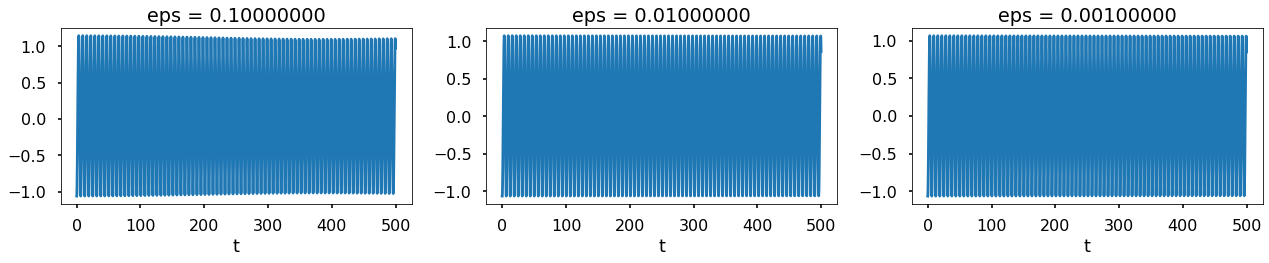

In [213]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.8f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.8f" % eps2)

plt.subplot(133)
plt.plot(sol3.t, sol3.y[0])
plt.xlabel('t')
plt.title("eps = %.8f" % eps3)

plt.tight_layout()
plt.show()

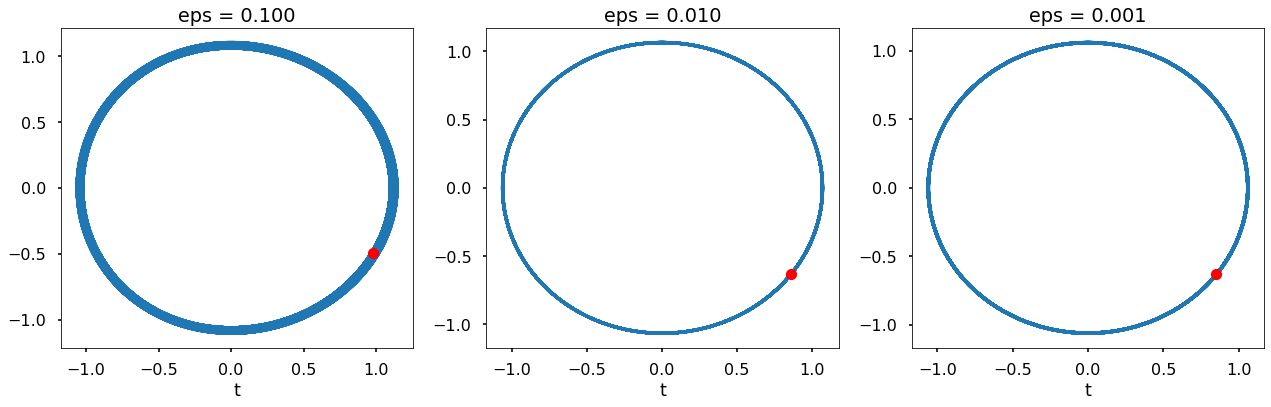

In [214]:
plt.figure(figsize = (18, 6))

plt.subplot(131)
plt.plot(sol1.y[0], sol1.y[1])
plt.plot(sol1.y[0][-1], sol1.y[1][-1], 'ro')
plt.xlabel('t')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.y[0], sol2.y[1])
plt.plot(sol2.y[0][-1], sol2.y[1][-1], 'ro')
plt.xlabel('t')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.y[0], sol3.y[1])
plt.plot(sol3.y[0][-1], sol3.y[1][-1], 'ro')
plt.xlabel('t')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Quick summary

所以我們知道最大的 periodic orbit 他的大小是 $y(t)\sim \epsilon^{-1} Y(t)$. 因此 $\beta = 1$.

---

In [182]:
def func0(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2)])

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

eps = 0.01;

# 定義 ODE
ode0 = lambda t,y: func0(t, y, eps);
# initial condition
y0 = [-49, 0.0]
# solve the ODE
sol0 = solve_ivp(ode0, [a, b], y0, t_eval=t_eval)


def func1(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2+np.cos(t))])

# 定義 ODE
ode1 = lambda t,y: func1(t, y, eps);
# initial condition
y1 = [-49, 0.0]

# Solve the system
sol1 = solve_ivp(ode1, [a, b], y1, t_eval=t_eval)

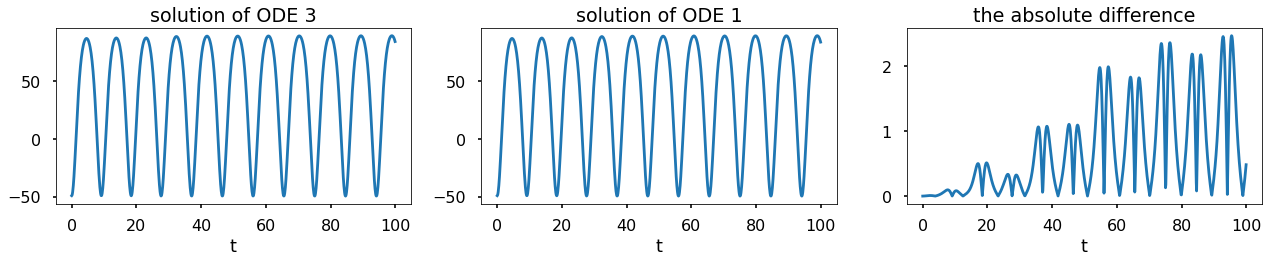

In [183]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol0.t, sol0.y[0])
plt.xlabel('t')
plt.title("solution of ODE 3")

plt.subplot(132)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("solution of ODE 1")

plt.subplot(133)
plt.plot(sol2.t, np.abs(sol1.y[0] - sol0.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

In [184]:
def func0(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2)])

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

eps = 0.001;

# 定義 ODE
ode0 = lambda t,y: func0(t, y, eps);
# initial condition
y0 = [-480, 0.0]
# solve the ODE
sol0 = solve_ivp(ode0, [a, b], y0, t_eval=t_eval)


def func1(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2+np.cos(t))])

# 定義 ODE
ode1 = lambda t,y: func1(t, y, eps);
# initial condition
y1 = [-480, 0.0]

# Solve the system
sol1 = solve_ivp(ode1, [a, b], y1, t_eval=t_eval)

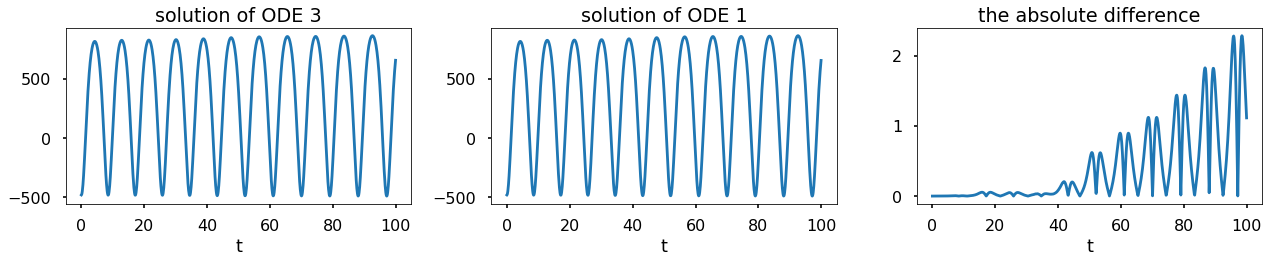

In [185]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol0.t, sol0.y[0])
plt.xlabel('t')
plt.title("solution of ODE 3")

plt.subplot(132)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("solution of ODE 1")

plt.subplot(133)
plt.plot(sol2.t, np.abs(sol1.y[0] - sol0.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

In [194]:
def func0(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2)])

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

eps = 0.0001;

# 定義 ODE
ode0 = lambda t,y: func0(t, y, eps);
# initial condition
y0 = [-4900, 0.0]
# solve the ODE
sol0 = solve_ivp(ode0, [a, b], y0, t_eval=t_eval)


def func1(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2+np.cos(t))])

# 定義 ODE
ode1 = lambda t,y: func1(t, y, eps);
# initial condition
y1 = [-4900, 0.0]

# Solve the system
sol1 = solve_ivp(ode1, [a, b], y1, t_eval=t_eval)

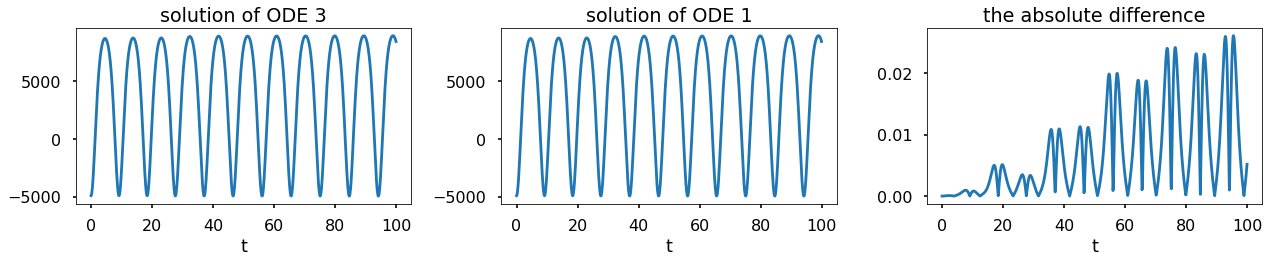

In [195]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol0.t, sol0.y[0])
plt.xlabel('t')
plt.title("solution of ODE 3")

plt.subplot(132)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("solution of ODE 1")

plt.subplot(133)
plt.plot(sol2.t, np.abs(sol1.y[0] - sol0.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

In [196]:
def func0(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2)])

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

eps = 0.00001;

# 定義 ODE
ode0 = lambda t,y: func0(t, y, eps);
# initial condition
y0 = [-49000, 0.0]
# solve the ODE
sol0 = solve_ivp(ode0, [a, b], y0, t_eval=t_eval)


def func1(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2+np.cos(t))])

# 定義 ODE
ode1 = lambda t,y: func1(t, y, eps);
# initial condition
y1 = [-49000, 0.0]

# Solve the system
sol1 = solve_ivp(ode1, [a, b], y1, t_eval=t_eval)

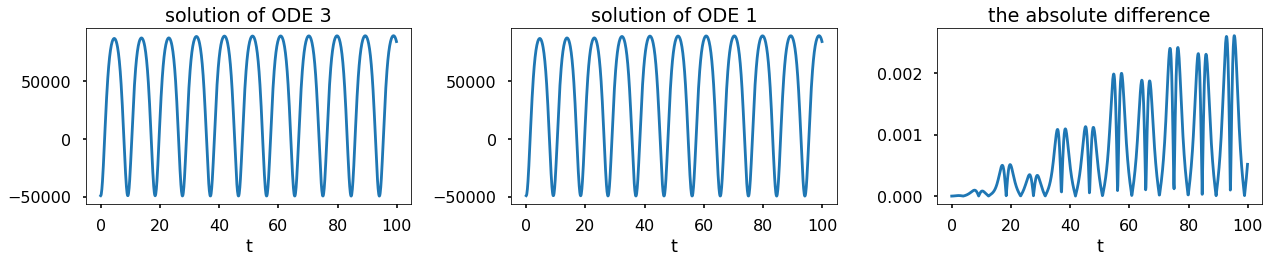

In [197]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol0.t, sol0.y[0])
plt.xlabel('t')
plt.title("solution of ODE 3")

plt.subplot(132)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("solution of ODE 1")

plt.subplot(133)
plt.plot(sol2.t, np.abs(sol1.y[0] - sol0.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

In [277]:
def func0(t,y,eps):
    return np.array([y[1], -y[0]])

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

eps = 0.0000001;

print(-(6.0/eps/5.0)**(1/3))

ini = -500

# 定義 ODE
ode0 = lambda t,y: func0(t, y, eps);
# initial condition
y0 = [ini, 0.0]
# solve the ODE
sol0 = solve_ivp(ode0, [a, b], y0, t_eval=t_eval)

def func1(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2+np.cos(t))])

# 定義 ODE
ode1 = lambda t,y: func1(t, y, eps);
# initial condition
y1 = [ini, 0.0]

# Solve the system
sol1 = solve_ivp(ode1, [a, b], y1, t_eval=t_eval)

-228.9428485106663


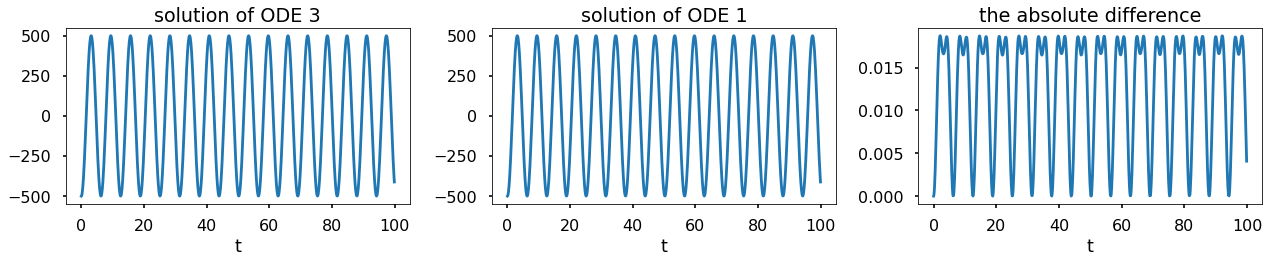

In [278]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol0.t, sol0.y[0])
plt.xlabel('t')
plt.title("solution of ODE 3")

plt.subplot(132)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("solution of ODE 1")

plt.subplot(133)
plt.plot(sol1.t, np.abs(sol1.y[0] - sol0.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

---

## WKB approximation

### Example 1

We consider the ODE
$$
\epsilon^2 y'' + x^2 y=0, \quad y(0)=1,\quad y(1)=1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=1, \quad y_1(1)=1,\\
y_2' &= -x^2 y_1/\epsilon^2, 
\end{align}
$$

In [5]:
def func(t,y,eps):
    return np.array([y[1], -(t**2)*y[0]/(eps**2)])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, 1.0, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

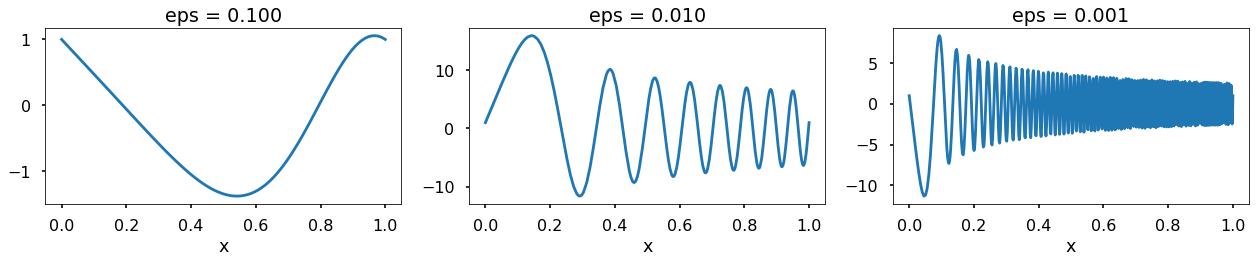

In [6]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 2

We consider the ODE
$$
\epsilon^2 y'' - x^2 y=0, \quad y(0)=1,\quad, y(1)=1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=1, \quad y_1(1)=1,\\
y_2' &= x^2 y_1/\epsilon^2, 
\end{align}
$$

In [7]:
def func(t,y,eps):
    return np.array([y[1], (t**2)*y[0]/(eps**2)])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, 1.0, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

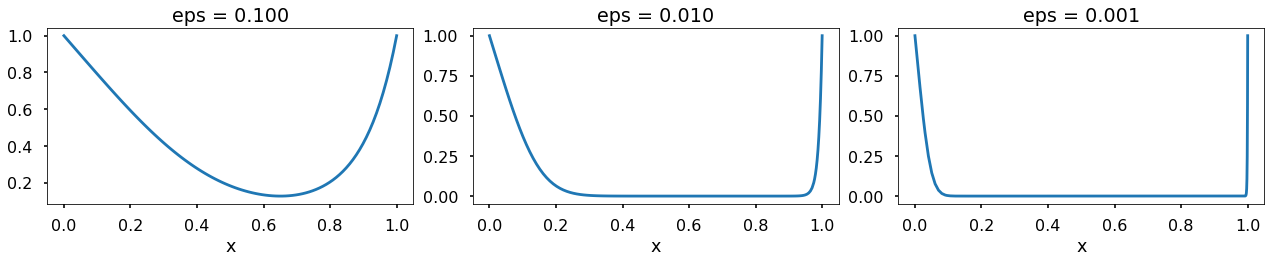

In [8]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 3

We consider the ODE
$$
\epsilon^2 y'' - (x-0.5) y=0, \quad y(0)=1,\quad y(1)=1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=1, \quad y_1(1)=1,\\
y_2' &= (x-0.5) y_1/\epsilon^2, 
\end{align}
$$

In [9]:
def func(t,y,eps):
    return np.array([y[1], (t-0.5)*y[0]/(eps**2)])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, 1.0, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

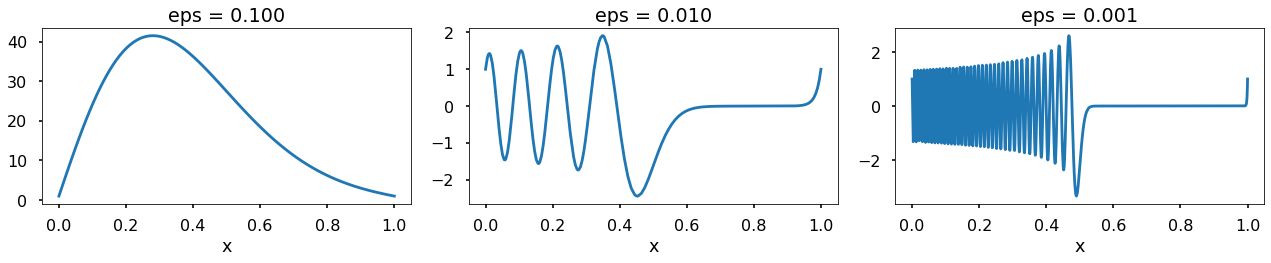

In [10]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

---

## Matched asymptotic expansions

### Example 1

We consider the ODE
$$
\epsilon y'' + y' = \cos(x), \quad y(0)=2, \quad y(\pi)=-1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=2, \quad y_1(\pi)=-1,\\
y_2' &= (\cos(x) - y_2)/\epsilon, 
\end{align}
$$

In [11]:
def func(t,y,eps):
    return np.array([y[1], (np.cos(t)-y[1])/eps])
def bc(ya,yb):
    return np.array([ya[0] - 2, yb[0]+1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, np.pi, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

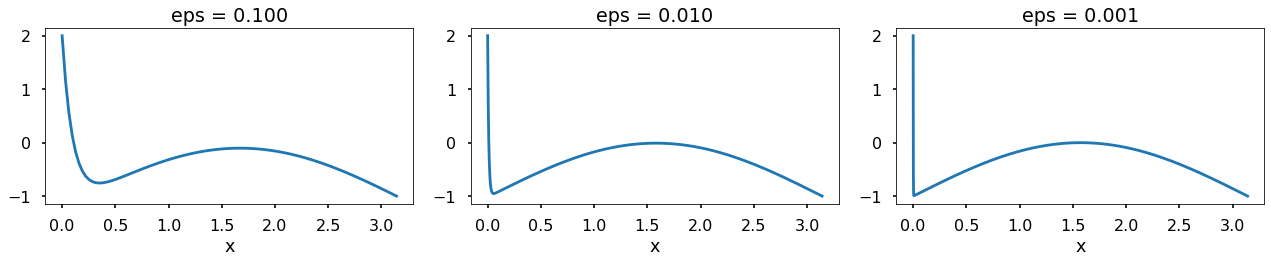

In [12]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 2

We consider the initial value problem
$$
\epsilon y' + y^2 = 4 - x^2, \quad y(0)=\frac{3}{2}, \quad \epsilon\ll 1.
$$

In [13]:
a = 0.0
b = 2.05
t_eval = np.arange(a, b, 0.0001)

y0 = 1.5

lambd = 0.1
F = lambda t, y: (4 -t**2 - y**2)/lambd
sol = solve_ivp(F, [a, b], [y0], t_eval=t_eval)

lambd2 = 0.01
F2 = lambda t, y: (4 -t**2 - y**2)/lambd2
sol2 = solve_ivp(F2, [a, b], [y0], t_eval=t_eval)

lambd3 = 0.001
F3 = lambda t, y: (4 -t**2 - y**2)/lambd3
sol3 = solve_ivp(F3, [a, b], [y0], t_eval=t_eval)

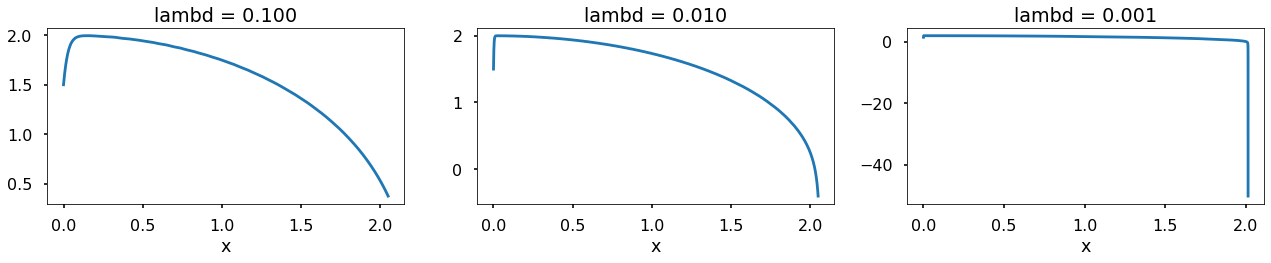

In [14]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol.t, sol.y[0])
plt.xlabel('x')
plt.title("lambd = %.3f" % lambd)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('x')
plt.title("lambd = %.3f" % lambd2)

plt.subplot(133)
plt.plot(sol3.t, sol3.y[0])
plt.xlabel('x')
plt.title("lambd = %.3f" % lambd3)

plt.tight_layout()
plt.show()

---

## Method of multiple scales

### Example 1

We consider the initial value problem
$$
y'' + \epsilon y' + y = 0, \quad y(0)=0, \quad y'(0)=1, \quad \epsilon\ll 1.
$$

In [15]:
def func(t,y,eps):
    return np.array([y[1], -eps*y[1]-y[0]])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

y0 = [0.0, 1.0]

# Solve the system.
sol1 = solve_ivp(ode1, [a, b], y0, t_eval=t_eval)
sol2 = solve_ivp(ode2, [a, b], y0, t_eval=t_eval)
sol3 = solve_ivp(ode3, [a, b], y0, t_eval=t_eval)

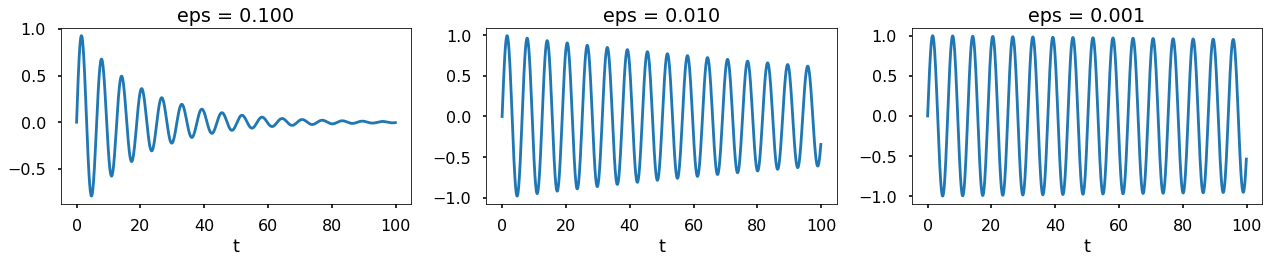

In [16]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.t, sol3.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 2

We consider the initial value problem
$$
y'' + (\epsilon t) y = 0, \quad y(0)=0, \quad y'(0)=1, \quad \epsilon\ll 1.
$$

In [17]:
def func(t,y,eps):
    return np.array([y[1], -eps*t*y[0]])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

y0 = [0.0, 1.0]

# Solve the system.
sol1 = solve_ivp(ode1, [a, b], y0, t_eval=t_eval)
sol2 = solve_ivp(ode2, [a, b], y0, t_eval=t_eval)
sol3 = solve_ivp(ode3, [a, b], y0, t_eval=t_eval)

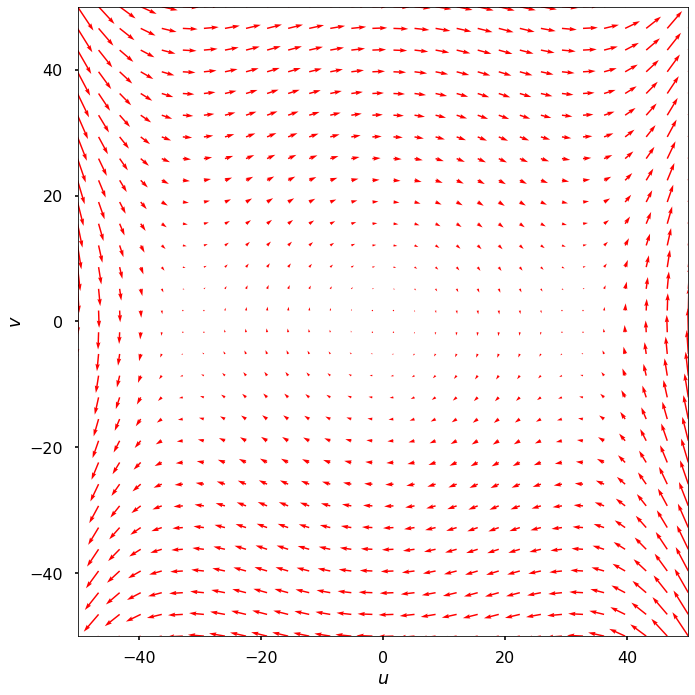

In [284]:
def f(Y, t, eps):
    y1, y2 = Y
    return [y2, eps*y1**3 - y1]

eps = 0.001

y1 = np.linspace(-50, 50, 30)
y2 = np.linspace(-50, 50, 30)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t, eps)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     
plt.figure(figsize = (10, 10))

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$u$')
plt.ylabel('$v$')
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.tight_layout()
plt.show()

### Example 3

We consider the initial value problem
$$
y'' + y + \epsilon y^3= 0, \quad y(0)=1, \quad y'(0)=0, \quad \epsilon\ll 1.
$$

In [125]:
def func(t,y,eps):
    return np.array([y[1], -y[0] + eps*(y[0]**2+np.cos(t))])

eps1 = 0;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.1;
ode2 = lambda t,y: func(t, y, eps2);

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

y0 = [-4.1, 0.0]

# Solve the system.
sol1 = solve_ivp(ode1, [a, b], y0, t_eval=t_eval)
sol2 = solve_ivp(ode2, [a, b], y0, t_eval=t_eval)

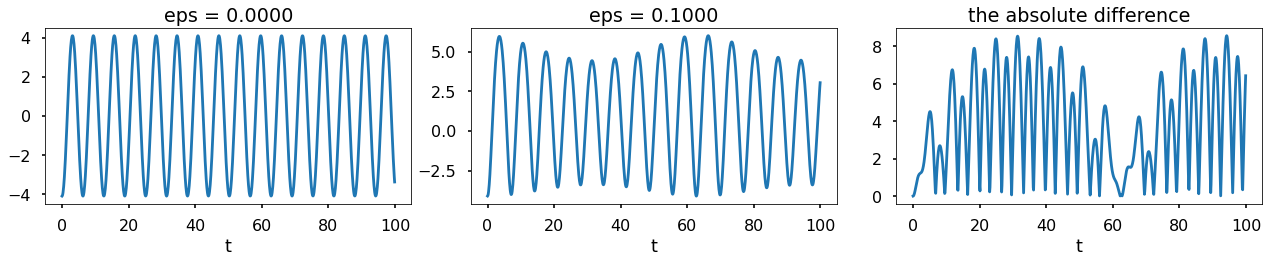

In [126]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.4f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.4f" % eps2)

plt.subplot(133)
plt.plot(sol2.t, np.abs(sol1.y[0] - sol2.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

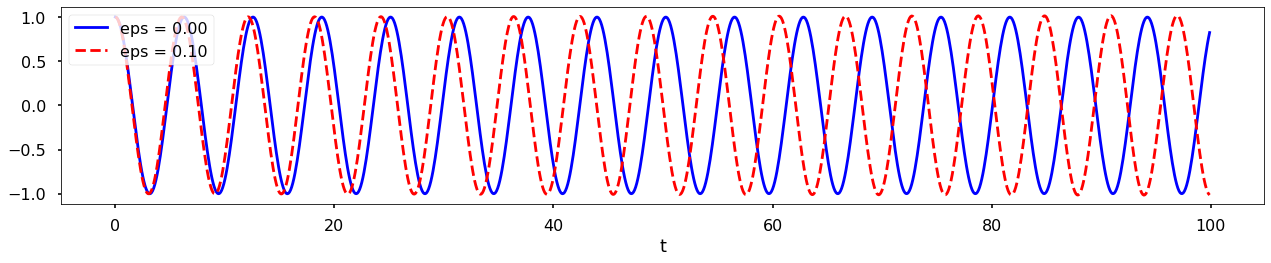

In [21]:
plt.figure(figsize = (18, 4))

plt.plot(sol1.t, sol1.y[0], 'b', label= "eps = %.2f" % eps1)
plt.plot(sol2.t, sol2.y[0], 'r--', label= "eps = %.2f" % eps2)
plt.xlabel('t')
plt.legend(loc = 2)

plt.tight_layout()
plt.show()